In [1]:
using LinearAlgebra, Random, PyPlot
#rc("axes.spines", top=false, right=false)
rc("font", family="Arial")

In [57]:
t1 = 224*1e-3 # time const of eye dynamics (s)
t2 = 13*1e-3  # another time const of eye dynamics (s)
tm = 10*1e-3
dt = 1e-3     # simulation time step (s)
T = 6*1e-3  # movement duration (s)
Tp = 4*1e-3  # post-movement duration (s)

# 2nd order
x0 = zeros(2) # initial state (pos=0, vel=0)
xf = [10, 0]  # final state (pos=10, vel=0)
Ac = [0 1; -1/(t1*t2) -1/t1-1/t2];
Bc = [0, 1]

n = size(x0)[1]
ntm = round(Int, T/dt)
ntp = round(Int, Tp/dt)
nt = ntm + ntp # total time steps    

A = I(n) + Ac * dt
B = Bc*dt

# Compute A^p * B and store
Apow_B = zeros(n, nt)
Apow_B[:, 1] = B
for t in 1:nt-1
    Apow_B[:, t+1] = A * Apow_B[:, t]
end

In [58]:
M = zeros(nt, nt)
for i in ntm+1:nt
    for j in 1:i-1
        M[i, j] = Apow_B[1, i-j] + 5e-6
    end
end

In [65]:
M2 = zeros(nt, nt)
for i in 1:nt-1
    for j in max(i, ntm)+1:nt
        M2[j, i] = Apow_B[1, j-i] + 5e-6
    end
end

In [63]:
a = [1,2,3,4]
a[1:3]

3-element Vector{Int64}:
 1
 2
 3

横方向の和から縦方向の和に変換．

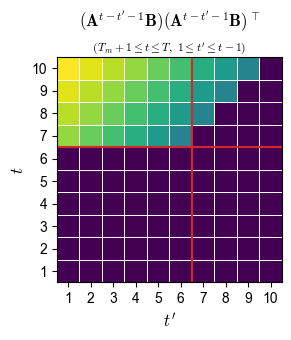

In [64]:
fig, ax = subplots(figsize=(3.5,3.5))
ax.set_title(L"$(\mathbf{A}^{t-t'-1} \mathbf{B}) (\mathbf{A}^{t-t'-1} \mathbf{B})^{\top}$"*"\n"*L"$_{(T_m+1\leq t \leq T,\ 1\leq t' \leq t-1)}$", math_fontfamily="cm")
ax.pcolormesh(M, edgecolors="white", linewidth=0.5)
ax.set_xticks(Array(1:nt).-0.5, Array(1:nt))
ax.set_yticks(Array(1:nt).-0.5, Array(1:nt))
ax.axvline(ntm, color="tab:red", lw=1.5)
ax.axhline(ntm, color="tab:red", lw=1.5)
#ax.annotate("a", (0, 0), (1, 1), arrowprops=Dict(:arrowstyle => "-|>")) 
ax.set_aspect("equal")
ax.set_ylabel(L"$t$", math_fontfamily="cm", fontsize=12)
ax.set_xlabel(L"$t'$", math_fontfamily="cm", fontsize=12)
fig.tight_layout()

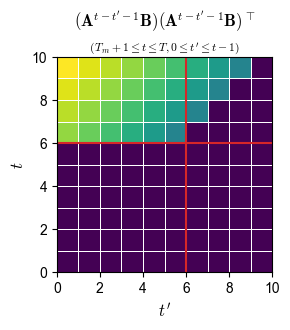

In [66]:
fig, ax = subplots(figsize=(3,3.5))
ax.set_title(L"$(\mathbf{A}^{t-t'-1} \mathbf{B}) (\mathbf{A}^{t-t'-1} \mathbf{B})^{\top}$"*"\n"*L"$_{(T_m+1\leq t \leq T, 0\leq t' \leq t-1)}$", math_fontfamily="cm")
ax.pcolormesh(M2, edgecolors="white", linewidth=0.5)
ax.axvline(ntm, color="tab:red", lw=1.5)
ax.axhline(ntm, color="tab:red", lw=1.5)
#ax.annotate("a", (0, 0), (1, 1), arrowprops=Dict(:arrowstyle => "-|>")) 
ax.set_aspect("equal")
ax.set_ylabel(L"$t$", math_fontfamily="cm", fontsize=12)
ax.set_xlabel(L"$t'$", math_fontfamily="cm", fontsize=12)
fig.tight_layout()